<a href="https://colab.research.google.com/github/OJO44/24bMachineLearning1/blob/main/BostonHousingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary python Libraries

In [ ]:
#for data cleaning
import pandas as pd
import numpy as np
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for feature engineering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#for machine learning
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



#2. Load Data

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv('/content/test.csv')
train.head()
test.head()
train.shape
test.shape

(1459, 80)

#3. Clean data

In [ ]:
#change column names to lower case
train.columns=map(str.lower,train.columns)
train.head()



,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# what is the number of missing values present
# train.shape
# train.columns[train.isnull().sum()>0] # columns with missing value present
# we could decide to do away with some which have a certain percent of missing values
# let us get this percentages
total_missing=train.isnull().sum().sort_values(ascending=False)
percent=train.isnull().sum().sort_values(ascending=False)/train.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable
missing_df=missing_df[total_missing>0] # only retain those with missing values
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage
missing_df

,total_missing,percentage_missing
variable,,
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
masvnrtype,872,59.726027
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945


In [ ]:
#Explore all the categorical variables
## get their names first
categorical_features = train.select_dtypes(include=['object'])
print(categorical_features.head())

  mszoning street alley lotshape landcontour utilities lotconfig landslope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  neighborhood condition1  ... garagetype garagefinish garagequal garagecond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  paveddrive poolqc fence miscfeature saletype sal

<Figure size 2000x2000 with 0 Axes>

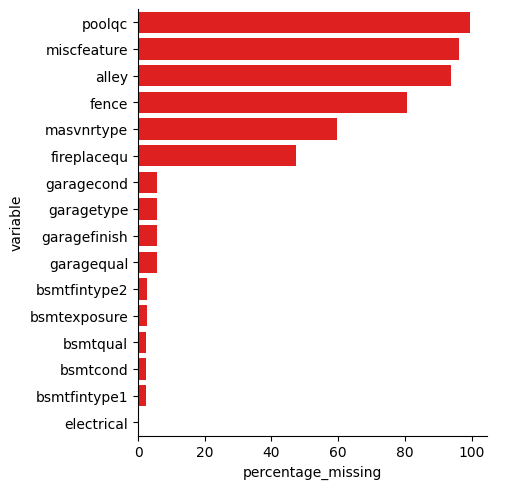

In [ ]:
## plot the missingness in the categorical variabele
missing_vars=[x for x in missing_df.index if x in categorical_features.columns]
missing_df_resetted=missing_df.reset_index()
missing_df_cat=missing_df_resetted[missing_df_resetted['variable'].isin(categorical_features.columns)]
## plot now
plt.figure(figsize=(20,20))
ax=sns.catplot(y='variable',x='percentage_missing',data=missing_df_cat,kind='bar',color='red')

In [ ]:
#Exploring numerical variables
# Exploring numerical variables
print(train.dtypes)  # Print the data types of all columns

# Select the numerical columns
numerical = train.select_dtypes(include=[int, float])
print(numerical.columns)  # Print the names of the numerical columns

id                 int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
                  ...   
mosold             int64
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
Length: 81, dtype: object
Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')


In [ ]:
numerical.head(4)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000


In [ ]:
#missing values in numerical variables
missing_df_resetted[missing_df_resetted['variable'].isin(numerical.columns)]

,variable,total_missing,percentage_missing
6,lotfrontage,259,17.739726
7,garageyrblt,81,5.547945
17,masvnrarea,8,0.547945


#4. Handling Missingness

In [ ]:
categorical_features.fillna('None')

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [ ]:
categorical_features.head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# for var in numerical.columns:
#     numerical.fillna(numerical[var].mode()[0])
# numerical.isnull().sum()
for var in ['lotfrontage','garageyrblt','masvnrarea']:
    train[var]=train[var].fillna(train[var].mode()[0])

for var in ['alley','miscfeature','poolqc','fence','fireplacequ','garagecond','garagequal',
            'garagefinish','garagetype','bsmtfintype2','bsmtfintype1','bsmtqual','bsmtcond','bsmtexposure','masvnrtype','electrical']:
    train[var]=train[var].fillna('None')

train.isnull().sum().sort_values(ascending=False)

id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64

In [ ]:
categorical_features.isnull()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False


In [ ]:

# Assuming 'train' is your DataFrame
# Handle numerical variables with missing values
for var in ['lotfrontage', 'garageyrblt', 'masvnrarea']:
    train[var] = train[var].fillna(train[var].mode()[0])

# Handle categorical variables with missing values
categorical_vars = ['alley', 'miscfeature', 'poolqc', 'fence', 'fireplacequ', 'garagecond', 'garagequal',
                   'garagefinish', 'garagetype', 'bsmtfintype2', 'bsmtfintype1', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'masvnrtype', 'electrical']

# Create a ColumnTransformer to handle both numerical and categorical variables
numeric_transformer = 'passthrough'
categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
    ],
    remainder='passthrough'
)

# Combine the transformers and apply them to the dataset
full_transformer = ColumnTransformer(transformers=[
    ('numerical', numeric_transformer),
    ('categorical', categorical_transformer, categorical_vars)
])


In [ ]:
# fix missing values in features

# Alley: NA means no alley acces so we fill with string «None»
categorical_features.alley = categorical_features.alley.fillna("None")

# BsmtQual et al – NA for features means "no basement", filling with string "None"
bsmt_cols = ['bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'bsmtbual']
for col in bsmt_cols:
    categorical_features[col] = categorical_features[col].fillna("None")

# Basement sizes: NaN likely means 0, can be set to int
for col in ['bsmtfullbath', 'bsmtbalfbath', 'bsmtunfsf', 'bsmtfinsf1', 'bsmtfinsf2', 'botalbsmtsf']:
    categorical_features[col] = categorical_features[col].fillna(0).astype(int)

# Electrical: NA likely means unknown, filling with most frequent value SBrkr
categorical_features.electrical = categorical_features.electrical.fillna("SBrkr")

# Exterior1st: NA likely means unknown, filling with most frequent value VinylSd
categorical_features.exterior1st = categorical_features.Exterior1st.fillna("VinylSd")

# Exterior2nd: NA likely means no 2nd material, filling with «None»
categorical_features.exterior2nd = categorical_features.exterior2nd.fillna("None")

# Fence: NA means «No Fence» filling with «None»
categorical_features.fence = categorical_features.fence.fillna("None")

# FireplaceQu: NA means «No Fireplace» filling with «None»
categorical_features.fireplacequ = categorical_features.fireplacequ.fillna("None")

# Functional: NA means «typical» filling with «Typ»
categorical_features.functional = categorical_features.functional.fillna("Typ")

# GarageType et al – NA means "no garage", filling with string "None"
grg_cols = ['garageCond', 'garageFinish', 'garageQual', 'garageType']
for col in grg_cols:
    categorical_features[col] = categorical_features[col].fillna("None")


# KitchenQual: filling NaNs with most frequent value «Typical/Average» («TA»)
categorical_features.kitchenqual = categorical_features.kitchenqual.fillna("TA")


# MSZoning filling NaNs with most frequent value «RL» (residental low density)
categorical_features.mszoning = categorical_features.mszoningoning.fillna("RL")


# Masonry: NA very likely means no masonry so we fill with string «None» or 0 for size
categorical_features.masvnrtype = categorical_features.masvnrtype.fillna("None")

# MiscFeature means likely no feature, filling with None
categorical_features.miscfeature = categorical_features.miscfeature.fillna("None")

# PoolQC means likely no pool, filling with None
categorical_features.poolqc = categorical_features.poolqc.fillna("None")

# SaleType: NaNs likely mean unknown, filling with most frequent value «WD»
categorical_features.saletype = categorical_features.saletype.fillna("WD")

# Utilities: NaNs likely mean unknown, filling with most frequent value «AllPub»
categorical_features.utilities = categorical_features.utilities.fillna("AllPub")

continous numerical variables

In [ ]:
#This line of code is creating a list of column names from the train DataFrame that contain the substrings 'yr' or 'year' in their names.
temporal_vars=[x for x in train.columns if 'yr' in x or  'year' in x]
temporal_vars

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

In [ ]:
numerical.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
discrete=[x for x in numerical.columns if len(train[x].unique())<25] # get all the discrete variables in the dataset
continous_numerical=[x for x in numerical.columns if x not in temporal_vars+["id"] and x not in discrete]
print("there are {} continous variables in this dataset".format(len(continous_numerical)))

there are 16 continous variables in this dataset


In [ ]:
train[continous_numerical].head()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


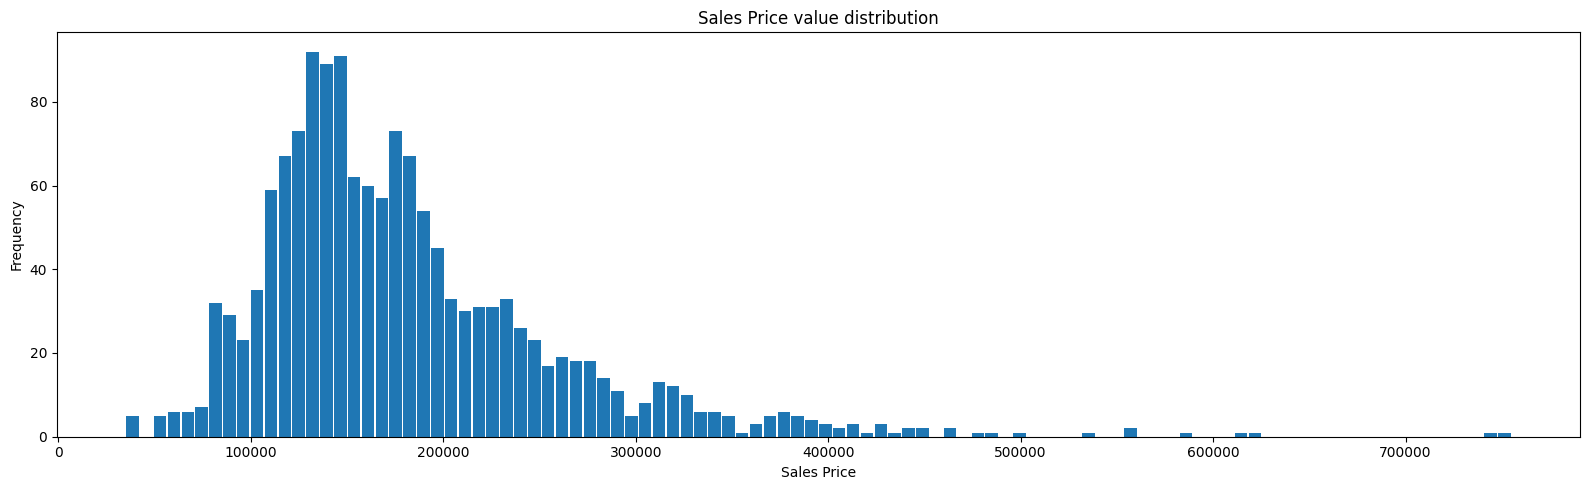

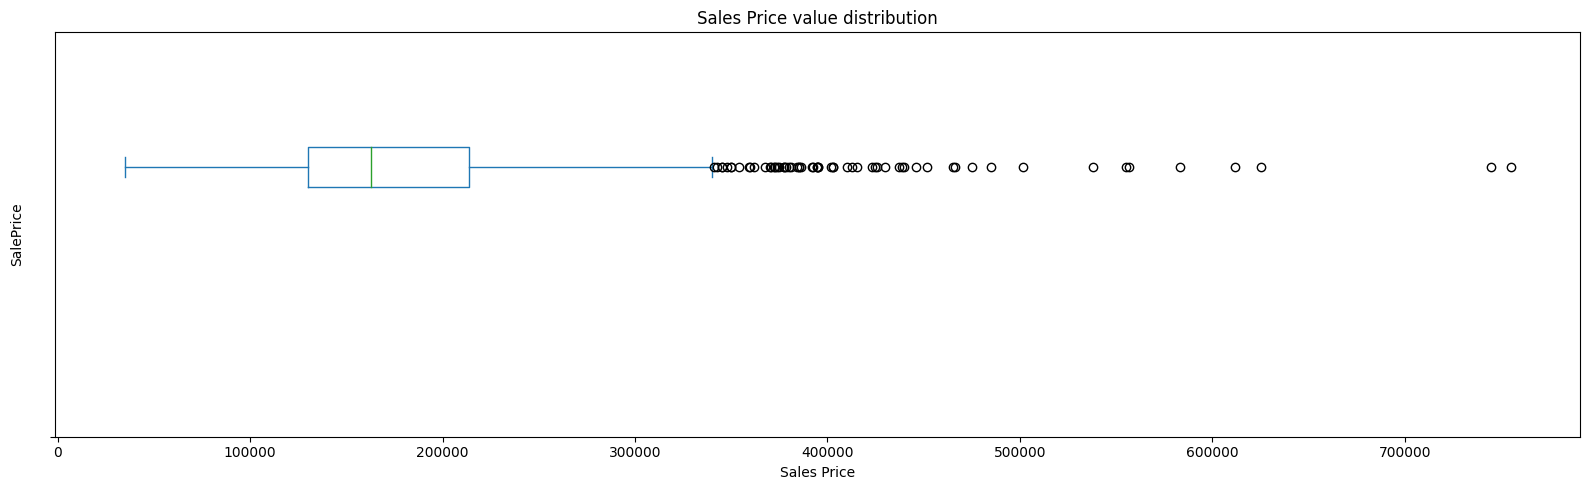

In [ ]:
#Skewness
plt.figure(figsize=(16,5))
train.saleprice.plot(kind="hist", bins=100, rwidth=0.9)
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
train.saleprice.plot(kind="box", vert=False)
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.yticks([0], [''])
plt.ylabel("SalePrice\n", rotation=90)
plt.tight_layout()
plt.show()

explore the relationship of these continous variables with selling price

In [ ]:
train[continous_numerical].corr()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
lotfrontage,1.000000,0.281283,0.174146,0.199171,0.034498,0.138852,0.359606,0.404099,0.070626,0.359866,0.317925,0.061329,0.131468,0.014349,0.036907,0.329220
lotarea,0.281283,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
masvnrarea,0.174146,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.370884,0.159991,0.122528,-0.109907,0.062248,0.472614
bsmtfinsf1,0.199171,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
bsmtfinsf2,0.034498,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
bsmtunfsf,0.138852,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
totalbsmtsf,0.359606,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stflrsf,0.404099,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852
2ndflrsf,0.070626,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.138347,0.092165,0.208026,0.061989,0.040606,0.319334
grlivarea,0.359866,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624


In [ ]:
#Identifies the 5 continuous numerical features that have the strongest positive or negative correlation with the 'saleprice' target variable.
corr_df=train[continous_numerical].corr()
corr_df.nlargest(5,'saleprice')

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
saleprice,0.329220,0.263843,0.472614,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,0.708624,0.623431,0.324413,0.315856,-0.128578,0.111447,1.000000
grlivarea,0.359866,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624
garagearea,0.317925,0.180403,0.370884,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,0.468997,1.000000,0.224666,0.241435,-0.121777,0.051412,0.623431
totalbsmtsf,0.359606,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stflrsf,0.404099,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


In [ ]:
#Accesses the salesprice column in the correlation matrix and sort the values therein in ascending order
corr_df['saleprice'].sort_values(ascending=False)


saleprice        1.000000
grlivarea        0.708624
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
masvnrarea       0.472614
bsmtfinsf1       0.386420
lotfrontage      0.329220
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
lotarea          0.263843
bsmtunfsf        0.214479
screenporch      0.111447
bsmtfinsf2      -0.011378
enclosedporch   -0.128578
Name: saleprice, dtype: float64

#Correlation

<Axes: >

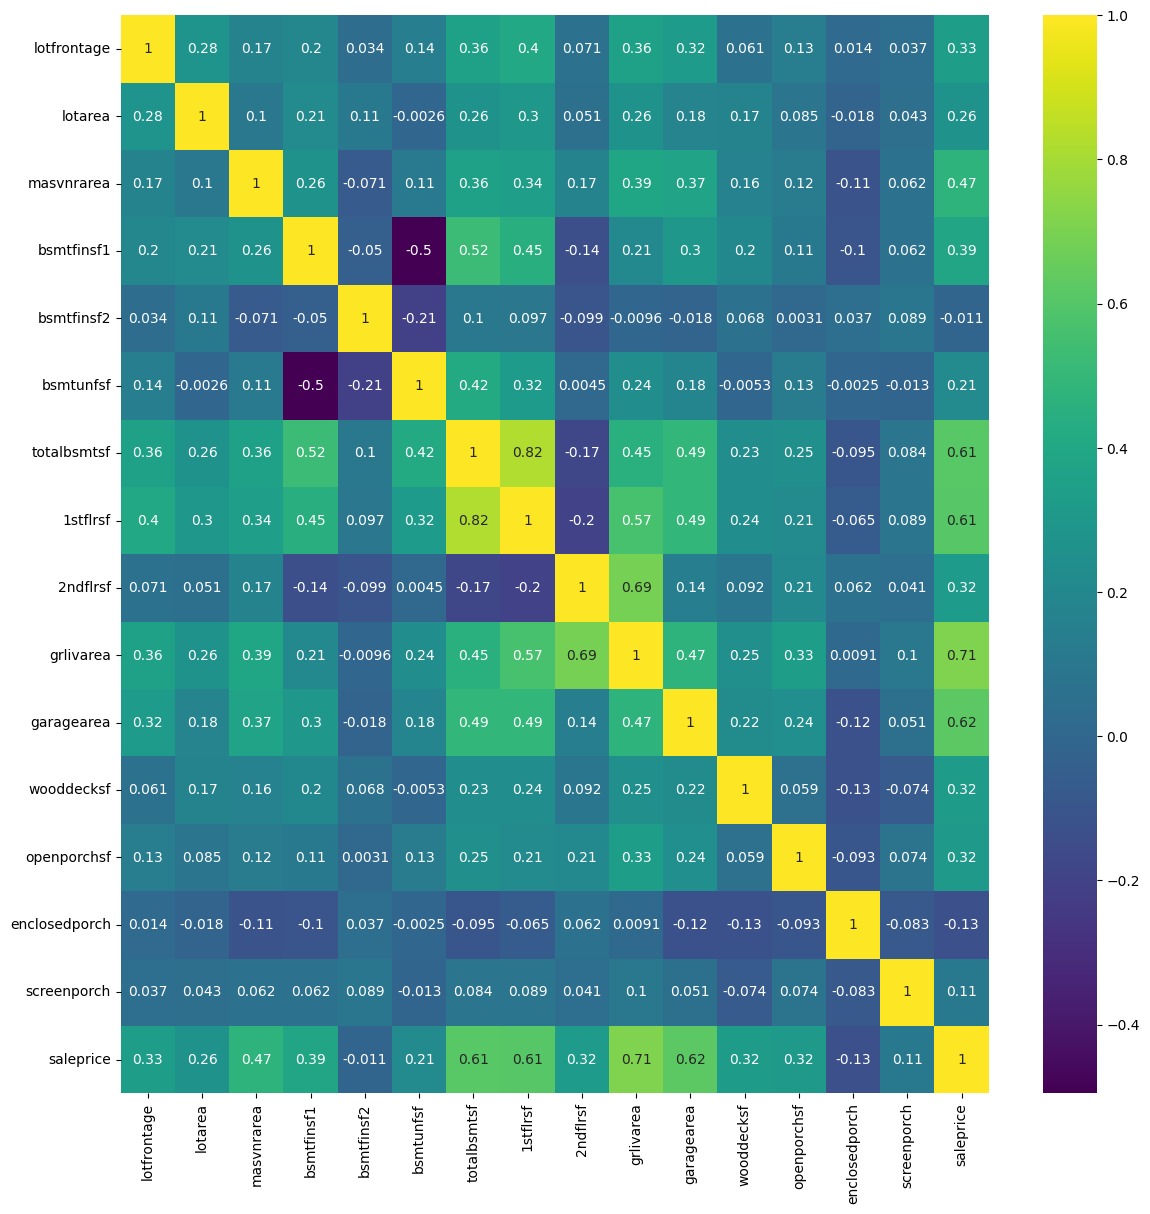

In [ ]:
#Visualize the correlation matrix
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr_df,annot=True,cmap='viridis')

In [ ]:
# those with high correlation with saleprice
cols=corr_df.nlargest(10,'saleprice')['saleprice'].index
cols

Index(['saleprice', 'grlivarea', 'garagearea', 'totalbsmtsf', '1stflrsf',
       'masvnrarea', 'bsmtfinsf1', 'lotfrontage', 'wooddecksf', '2ndflrsf'],
      dtype='object')

<Axes: >

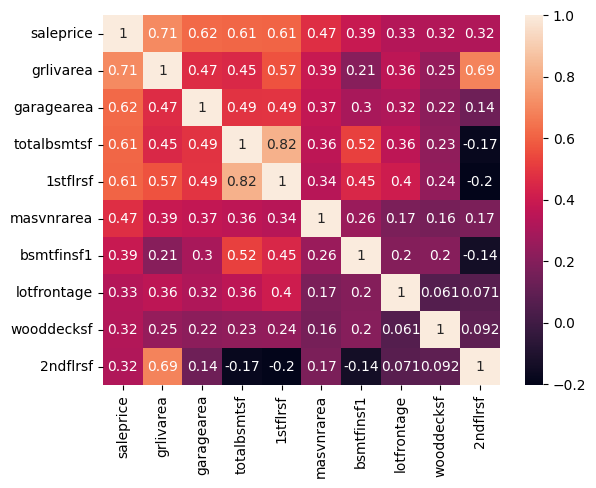

In [ ]:
#visualize the correlation matrix for cor using a heatmap
corrmap=np.corrcoef(train[cols].values.T)
sns.heatmap(corrmap,annot=True,xticklabels=cols.values,yticklabels=cols.values)

explore the relationship between the discrete variables and selling price

In [ ]:
train['mssubclass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [ ]:
train[discrete].head()

,mssubclass,overallqual,overallcond,lowqualfinsf,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,3ssnporch,poolarea,miscval,mosold,yrsold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


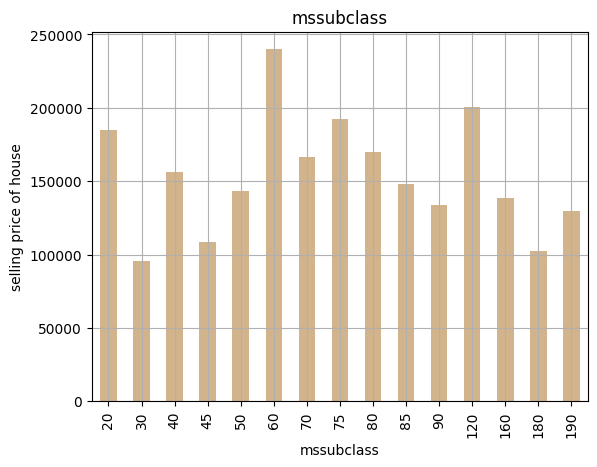

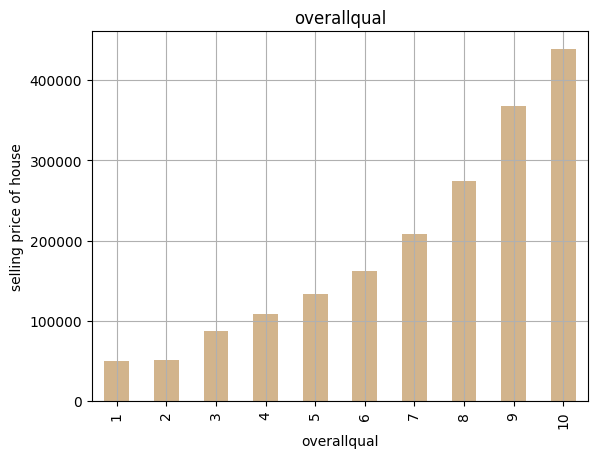

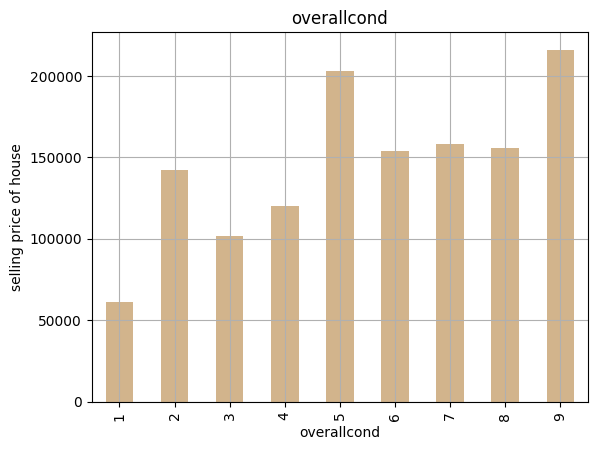

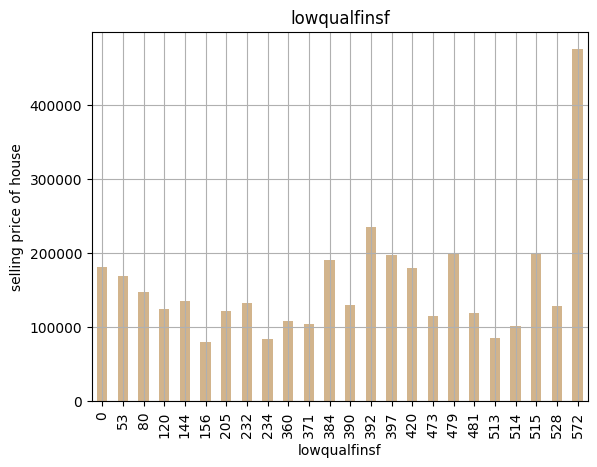

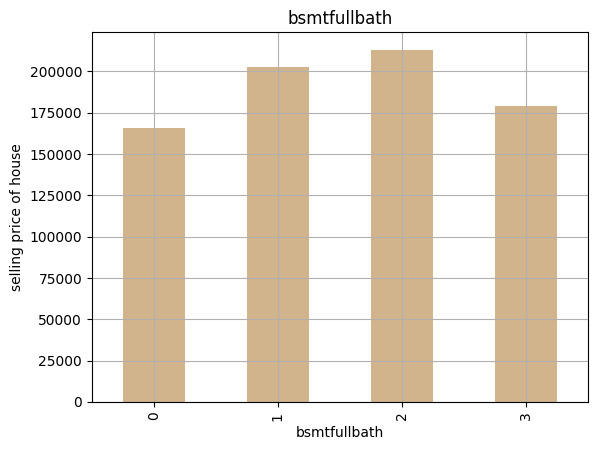

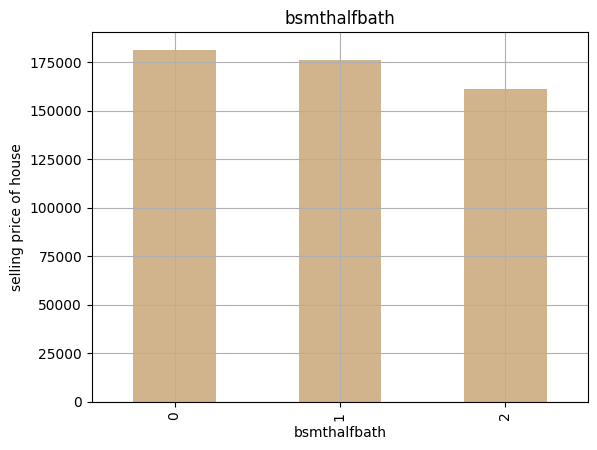

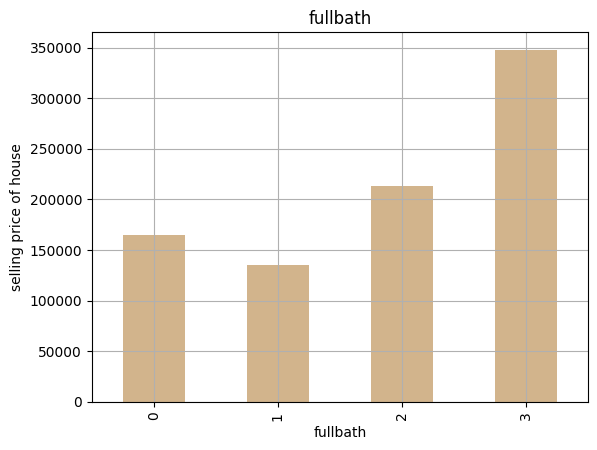

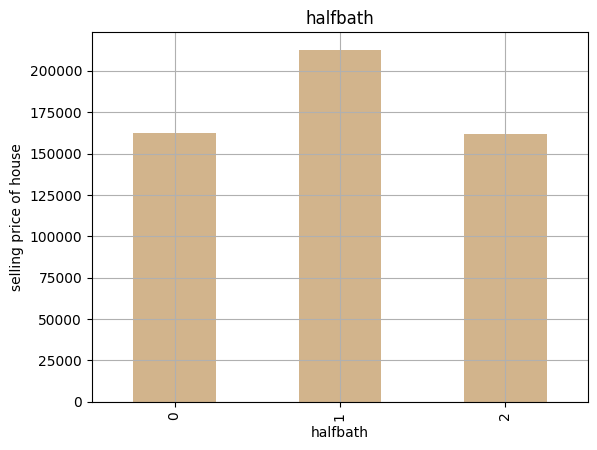

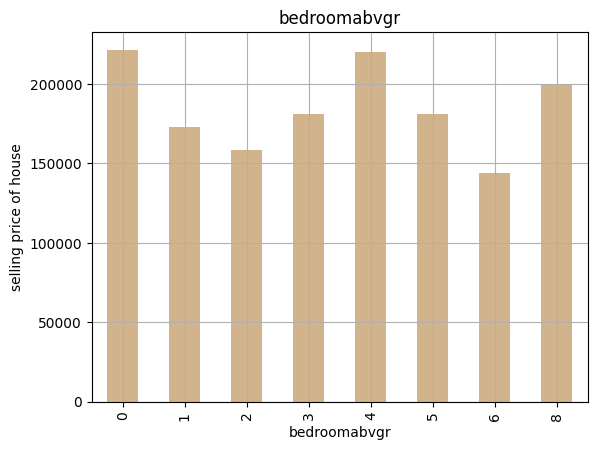

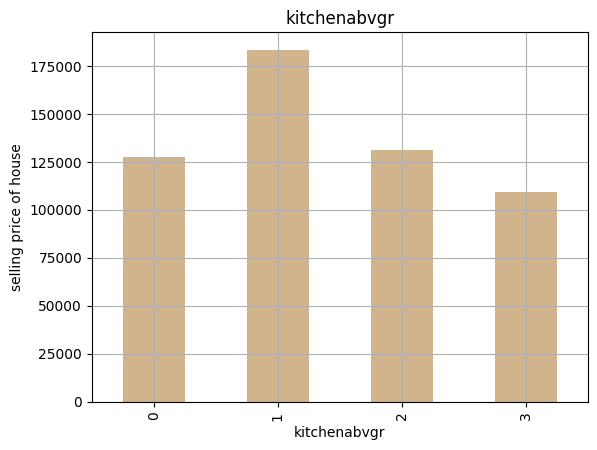

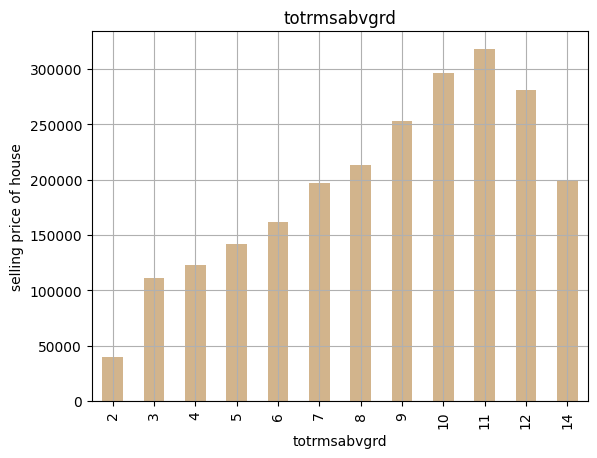

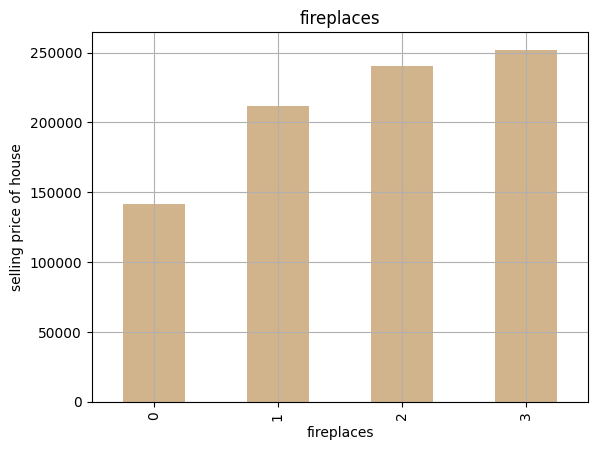

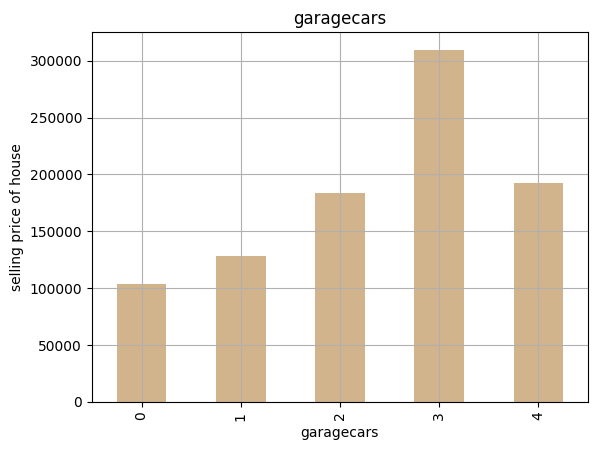

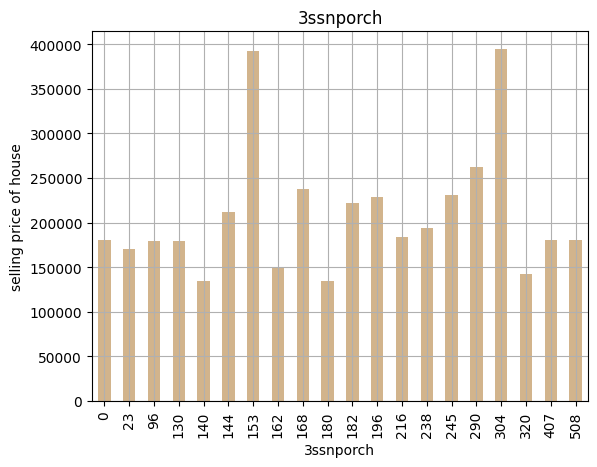

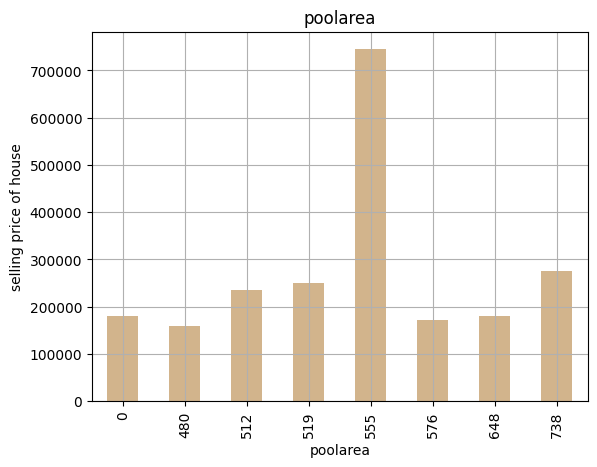

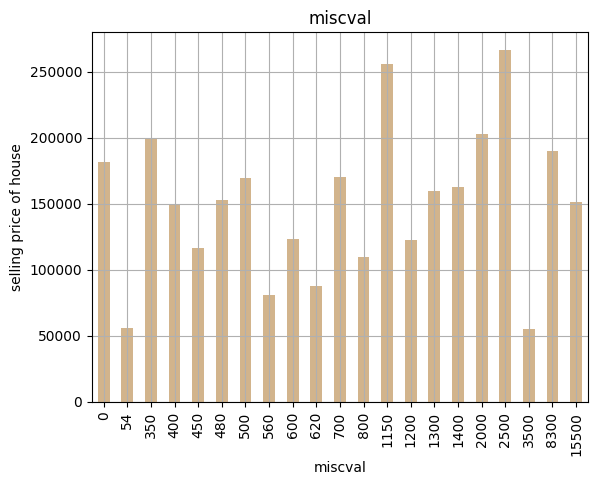

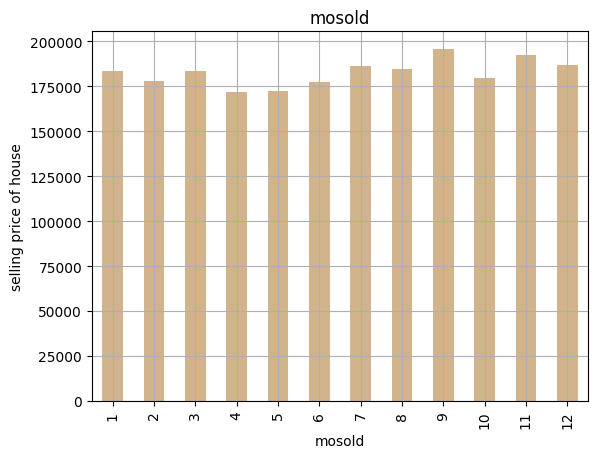

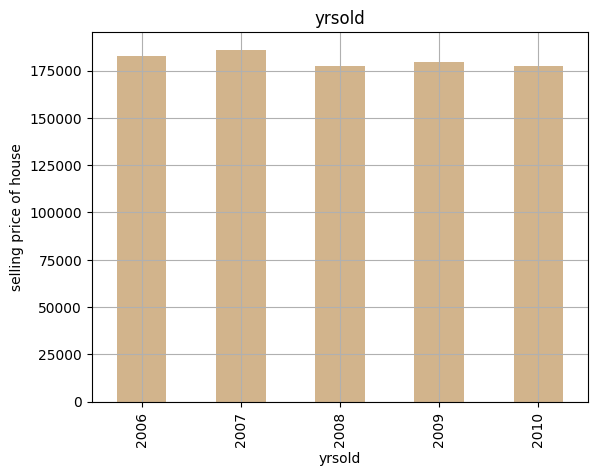

In [ ]:
def plot():
  for var in discrete:

        if not var=='mssubclass'or not var=='3ssnporch':
            train.groupby(var)['saleprice'].mean().plot.bar(color='tan')
            plt.ylabel('selling price of house')
            plt.title(var)
            plt.grid(True)
            plt.show()
plot()

#how the temporal variables relate to selling price

In [ ]:
temporal_vars

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

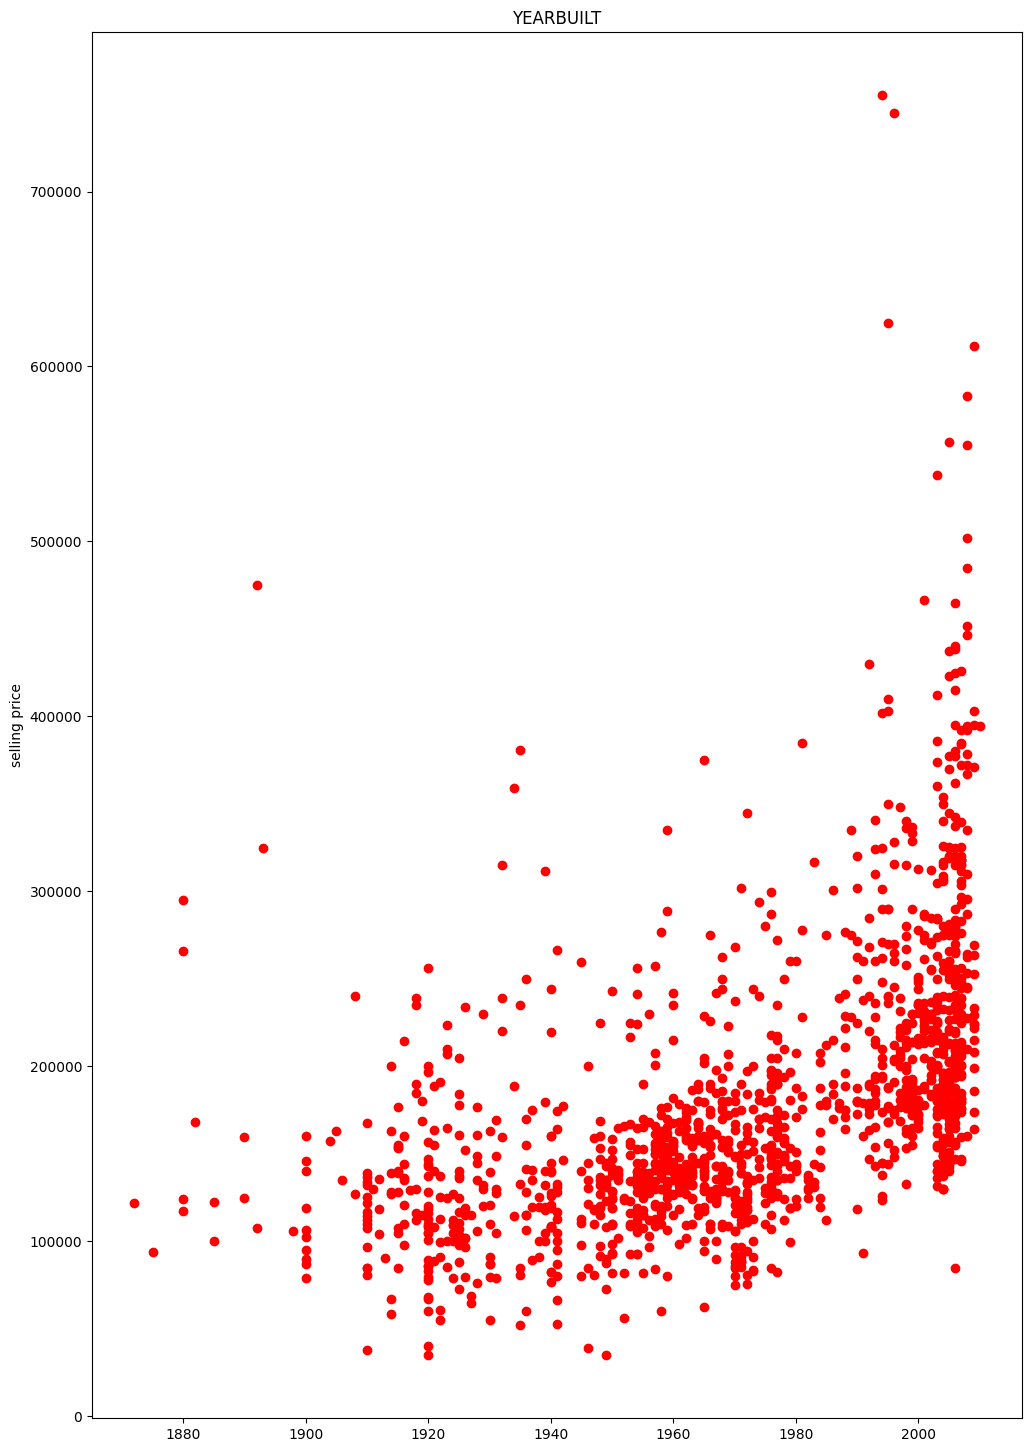

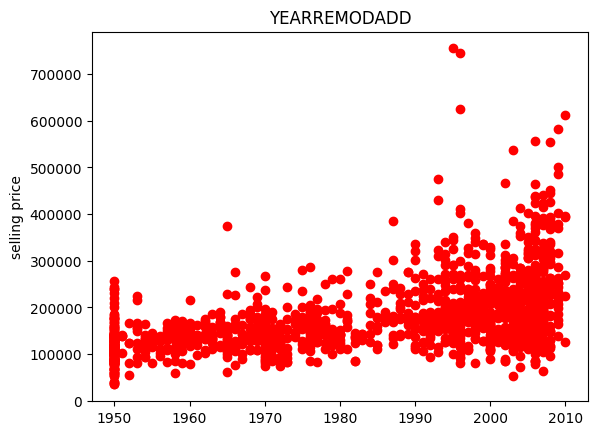

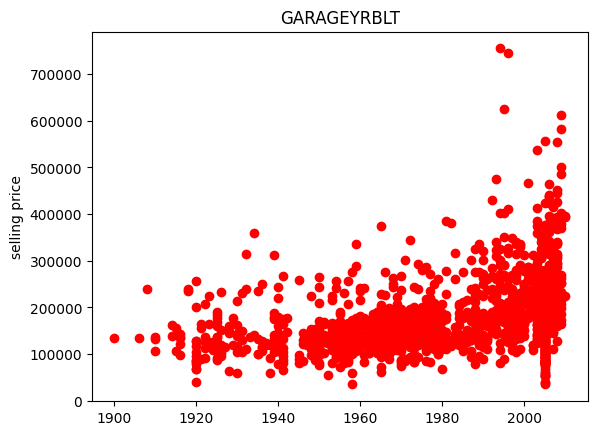

In [ ]:
fig = plt.figure(figsize=(12,18))
def plt_temporal():
    for var in temporal_vars:
        if not var=='yrsold':
            plt.scatter(x=train[var],y=train['saleprice'],c='red')
            plt.ylabel('selling price')
            plt.title(var.upper())
            plt.show()
plt_temporal()

#Outliers

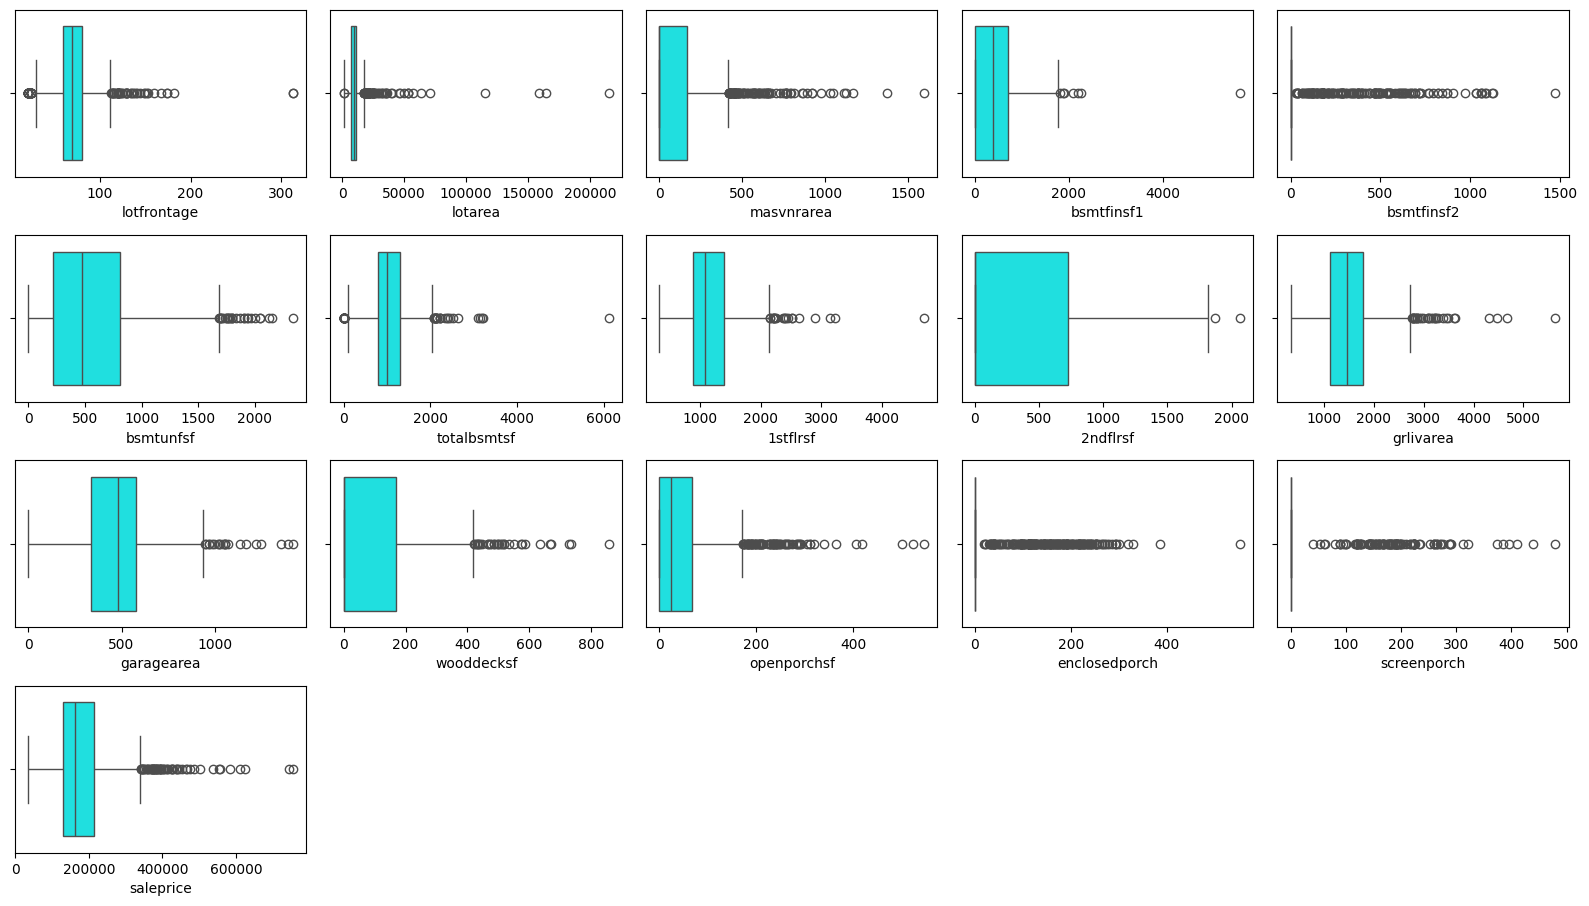

In [ ]:
# identify then plot
# univariate
# multivariate
# remove them
# do a box plots for the numerical vars
# fig = plt.figure(figsize=(16,20))
# for i in range(len(numerical.columns)):
#     fig.add_subplot(9, 4, i+1)
#     for var in numerical:
#         sns.boxplot(numerical[var])
# plt.show()
continous_df=numerical[continous_numerical]# get the contious variables data frame

fig=plt.figure(figsize=(16,20))
for var in range(len(continous_df.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=continous_df.iloc[:,var],color="cyan")
plt.tight_layout()
plt.show()

In [ ]:
display(train.saleprice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

Prices range from 34'900 USD to a hefty 755'000.
The average sale price (the mean) is 180'921 USD.
The median is lower: 163'000 USD. This is to be expected since the mean is sensitive to outliers and in this case pulled towards outlying higher values.
The standard deviation is around 79k. So on average, prices in the dataset tend to vary by this amount around the mean of ~180k.

#Encoding

In [ ]:

# Assuming 'train' is your DataFrame
# Handle numerical variables with missing values
for var in ['lotfrontage', 'garageyrblt', 'masvnrarea']:
    train[var] = train[var].fillna(train[var].mode()[0])

# Handle categorical variables with missing values
categorical_vars = ['alley', 'miscfeature', 'poolqc', 'fence', 'fireplacequ', 'garagecond', 'garagequal',
                   'garagefinish', 'garagetype', 'bsmtfintype2', 'bsmtfintype1', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'masvnrtype', 'electrical']

# Create a ColumnTransformer to handle both numerical and categorical variables
numeric_transformer = 'passthrough'
categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
    ],
    remainder='passthrough'
)

# Combine the transformers and apply them to the dataset
full_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numerical),
    ('categorical', categorical_transformer, categorical_vars)
])


#Regression Models

In [ ]:
numerical.columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [ ]:

# Preprocess the data
X = train[["garagearea"]]
y = train["saleprice"]

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up the cross-validation
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation
scores = cross_val_score(clf, X_scaled, y, cv=kfold, scoring=metric)
rmsle = np.sqrt(-scores.mean())

print(f"Average RMSLE: {rmsle:.4f}")


Average RMSLE: 0.3162


#training with one explratory variable

In [ ]:

X = train[["overallqual"]]
y = train.saleprice
metric = 'neg_mean_squared_error'
clf = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} RMSE")


48522.2919 RMSE


In [ ]:

X = train.drop("saleprice", axis=1)
y = train["saleprice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)


In [ ]:

# Create a OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Create a ColumnTransformer object to apply one-hot encoding to the categorical features
transformer = ColumnTransformer(
    transformers=[
        ("one_hot", one_hot_encoder, categorical_cols)
    ],
    remainder="passthrough"
)

# Fit and transform the input data 'X'
transformed_X = transformer.fit_transform(X)

In [ ]:
dummies = pd.get_dummies(categorical_features)
dummies

,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_None,alley_Pave,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#lets fit our model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test,y_test)
